In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
random.seed(5)


def generate_points(n: int=6) -> list[tuple]:
    points = []
    for i in range(n):
        points.append((random.randint(0, 100), random.randint(0, 100)))
    return points

In [3]:
def calc_dist(points: list[tuple]) -> list[list]:
    result = []
    for i, left in enumerate(points):
        row = [left]
        for j, right in enumerate(points):
            dist = (left[0] - right[0])**2 + (left[1] - right[1])**2
            row.append(dist)
        result.append(row)
    return result

def find_sorted_index(with_dist: list[list]) -> list[list]:
    results = []
    for row in with_dist:
        dists = row[1:]
        sorted_dists = sorted(dists)
        indices = [dists.index(i) for i in sorted_dists]
        row[1:] = indices
        results.append(row)
    return results

In [4]:
def find_k_nearest(points: list[tuple], with_indices: list[list], k: int) -> list[tuple]:
    results = []
    for row in with_indices:
        # Since the closest point to the current point is itself, we can get the point itself directly, so here is +2
        k_indices = row[1:k+2]
        the_points = [points[i] for i in k_indices]
        results.append(the_points)
    return results

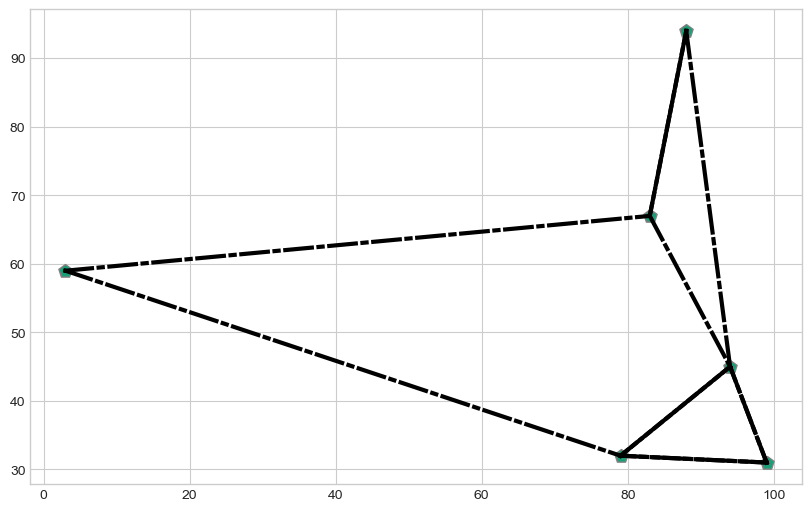

In [5]:
def draw_points(points: list[tuple]):
    x, y = [], []
    for point in points:
        x.append(point[0])
        y.append(point[1])
    plt.scatter(x, y, s=100)


def draw_lines(nearest: list[list]):
    for row in nearest:
        start = row[0]
        for end in row[1:]:
            plt.plot([start[0], end[0]], [start[1], end[1]], color='black')


def orig_main(count: int = 6):
    k = 2
    points = generate_points(count)
    with_dist = calc_dist(points)
    sorted_index = find_sorted_index(with_dist)
    nearest = find_k_nearest(points, sorted_index, k)
    return points, nearest


points, nearest =  orig_main(6)
draw_points(points)
draw_lines(nearest)

In [6]:
# Broadcasting
a = np.arange(6).reshape(1, 6)
b = np.arange(6).reshape(6, 1)
a + b

array([[ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10]])

In [7]:
# Sorting
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [8]:
# Fancy Indexing
x = np.array([8, 2, 4, 5, 3, 7, 1, 6])
ind = [0, 3, 7]
print(x[ind])

[8 5 6]


### NumPy Solution

In [9]:
import numpy as np
from numpy import ndarray

In [10]:
random.seed(5)

def structured_array(points: list[tuple]) -> ndarray:
    dt = np.dtype([('x', 'int'), ('y', 'int')])
    return np.array(points, dtype=dt)

In [11]:
def np_find_dist(s_array: ndarray) -> ndarray:
    a = s_array.reshape(6, 1)
    b = s_array.reshape(1, 6)
    dist = (a['x'] - b['x'])**2 + (a['y'] - b['y'])**2
    return dist

In [12]:
def np_k_nearest(dist: ndarray, k: int) -> ndarray:
    k_indices = np.argpartition(dist, k+1, axis=1)[:, :k+1]
    return k_indices

In [13]:
def np_draw_points(s_array: ndarray):
    plt.scatter(s_array['x'], s_array['y'], s=100)

In [14]:
def np_draw_lines(s_array: ndarray, k_indices: ndarray, k: int):
    for i in range(s_array.shape[0]):
        for j in k_indices[i, :k+1]:
            plt.plot([s_array[i]['x'], s_array[j]['x']],
                     [s_array[i]['y'], s_array[j]['y']],
                     color='black')

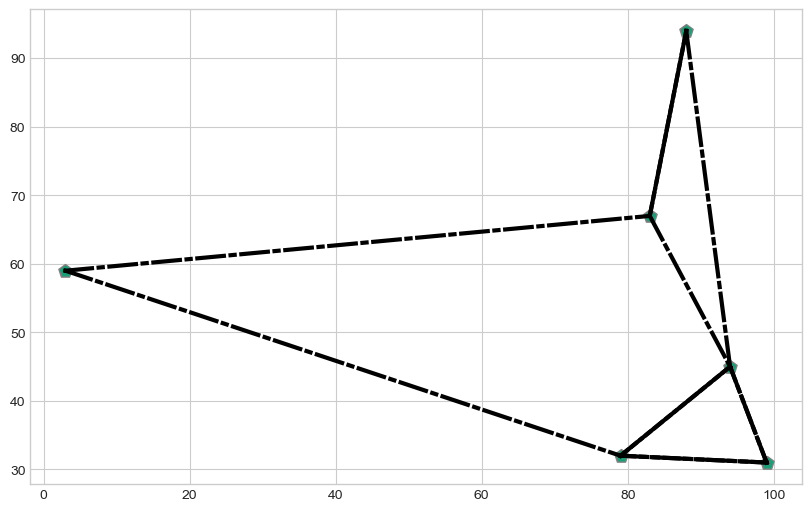

In [15]:
def np_main(count: int = 6):
    k = 2
    points = generate_points(count)
    s_array = structured_array(points)
    np_dist = np_find_dist(s_array)
    k_indices = np_k_nearest(np_dist, k)

    results = [s_array[k_indices[i, :k+1]] 
               for i in range(s_array.shape[0])]
    return results, s_array, k_indices, k


results, s_array, k_indices, k = np_main(6)
np_draw_points(s_array)
np_draw_lines(s_array, k_indices, k)